In [1]:
from lib import Estimator, load_dataset

In [2]:
X_val, y_val, X_test, y_test = load_dataset("../dataset")

In [3]:
import cv2
import numpy as np

from sklearn.cluster import KMeans

# We train a KMeans to identify two groups of pixels:
# - The "black pixels"
# - The "white pixels"
# This is much more efficient than using a binary filter
def train_kmeans(X):
    length, h, w = X.shape[:3]
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X.reshape(length*h*w, 3))
    return kmeans

def cluster(kmeans, img):
    h, w = img.shape[:2]
    labels = kmeans.predict(img.reshape(h*w, 3))
    return labels.reshape(h, w)

In [4]:
# Limit kmeans training to 200 images to avoid too much memory consumption
kmeans = train_kmeans(X_val[:200])

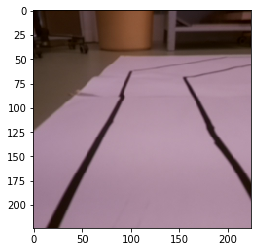

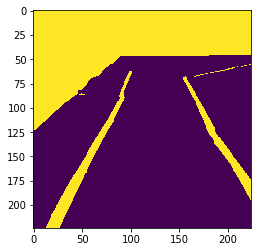

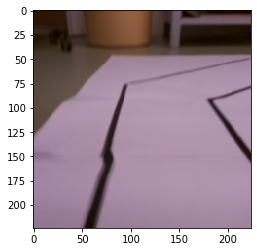

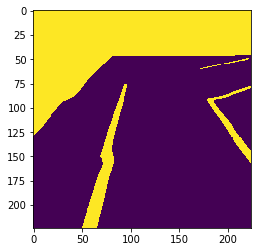

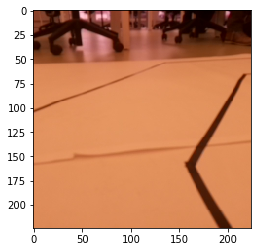

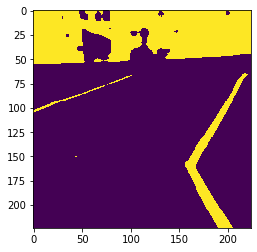

In [7]:
import matplotlib.pyplot as plt

for img in X_val[300:303]:
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(cluster(kmeans, img))

In [52]:
from collections import defaultdict

def weird(img, limit):
    seen = set()
    clusters = {}
    
    height, width = img.shape[:2]
    
    stack = [(0, 0)]
    
    count = 0
    
    while stack:
        y, x = stack.pop()
        loc = (y, x)
        
        pix = img[y][x]
        count += 1
        
        neighbors = [
            (y+1, x, y < height - 1),
            (y-1, x, y > 0),
            (y, x+1, x < width - 1),
            (y, x-1, x> 0)
        ]
        
        neighbors = [(y, x) for (y, x, c) in neighbors if c]
        
        # Chose either a color from neighbors or a new color
        colors = [clusters.get(p) for p in neighbors if img[p] == pix and clusters.get(p) is not None]
        
        color = count
        if colors:
            color = colors[0]
            
        clusters[loc] = color
        
        seen.add((y, x))
        
        for (yi, xi) in neighbors:
            n = (yi, xi)
            if n in seen:
                continue

            if img[n] == pix:
                clusters[n] = color
            stack.append(n)
                
    sizes = defaultdict(int)
    
    for k in clusters.values():
        sizes[k] += 1
                
    res = img.copy()
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if sizes[clusters[(y, x)]] > limit:
                res[y][x] = 0
    
    return res

In [53]:
print(weird(np.array([0, 0, 1, 0, 0, 1, 0, 1, 0]).reshape(3, 3), 1))

[[0 0 0]
 [0 0 0]
 [0 1 0]]


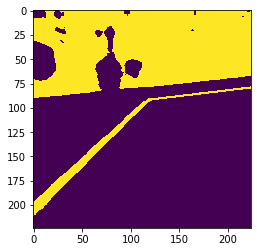

In [54]:
plt.imshow(cluster(kmeans, X_val[200]))

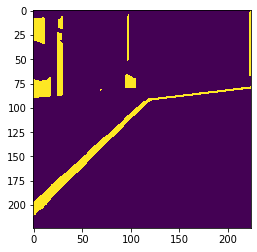

In [57]:
plt.imshow(weird(cluster(kmeans, X_val[200]), 500))